<h1>Содержание<span class="tocSkip"></span></h1>
<div class="toc"><ul class="toc-item"></ul><li><span><a href="#Отток-клиентов" data-toc-modified-id="Отток-клиентов-1">Отток клиентов</a></span><ul class="toc-item"><li><span><a href="#Описание-проекта" data-toc-modified-id="Описание-проекта-1.1">Описание проекта</a></span></li><li><span><a href="#Описание-данных" data-toc-modified-id="Описание-данных-1.2">Описание данных</a></span></li><li><span><a href="#План-работы" data-toc-modified-id="План-работы-1.3">План работы</a></span></li><li><span><a href="#Результат-работы" data-toc-modified-id="Результат-работы-1.4">Результат работы</a></span></li></ul></li><li><span><a href="#Открытие-и-подготовка-данных" data-toc-modified-id="Открытие-и-подготовка-данных-2">Открытие и подготовка данных</a></span><ul class="toc-item"><li><span><a href="#Открытие-и-изучение-файла" data-toc-modified-id="Открытие-и-изучение-файла-2.1">Открытие и изучение файла</a></span></li><li><span><a href="#Предобработка-данных" data-toc-modified-id="Предобработка-данных-2.2">Предобработка данных</a></span></li><li><span><a href="#Разбиение-данных-на-выборки-и-масштабирование-признаков" data-toc-modified-id="Разбиение-данных-на-выборки-и-масштабирование-признаков-2.3">Разбиение данных на выборки и масштабирование признаков</a></span></li><li><span><a href="#Вывод" data-toc-modified-id="Вывод-2.4">Вывод</a></span></li></ul></li><li><span><a href="#Исследование-задачи" data-toc-modified-id="Исследование-задачи-3">Исследование задачи</a></span><ul class="toc-item"><li><span><a href="#Исследование-модели" data-toc-modified-id="Исследование-модели-3.1">Исследование модели</a></span><ul class="toc-item"><li><span><a href="#Вывод" data-toc-modified-id="Вывод-3.1.1">Вывод</a></span></li></ul></li><li><span><a href="#Борьба-с-дисбалансом" data-toc-modified-id="Борьба-с-дисбалансом-3.2">Борьба с дисбалансом</a></span><ul class="toc-item"><li><span><a href="#Вывод" data-toc-modified-id="Вывод-3.2.1">Вывод</a></span></li></ul></li><li><span><a href="#Тестирование-модели" data-toc-modified-id="Тестирование-модели-3.3">Тестирование модели</a></span><ul class="toc-item"><li><span><a href="#Вывод" data-toc-modified-id="Вывод-3.3.1">Вывод</a></span></li></ul></li><li><span><a href="#Проверка-модели-на-тестовой-выборке" data-toc-modified-id="Проверка-модели-на-тестовой-выборке-3.4">Проверка модели на тестовой выборке</a></span><ul class="toc-item"><li><span><a href="#Вывод" data-toc-modified-id="Вывод-3.4.1">Вывод</a></span></li></ul></li></ul></li><li><span><a href="#Общий-вывод" data-toc-modified-id="Общий-вывод-4">Общий вывод</a></span></div>

# Отток клиентов

## Описание проекта
Из «Бета-Банка» стали уходить клиенты. Каждый месяц. Немного, но заметно. Банковские маркетологи посчитали: сохранять текущих клиентов дешевле, чем привлекать новых.
Нужно спрогнозировать, уйдёт клиент из банка в ближайшее время или нет. Вам предоставлены исторические данные о поведении клиентов и расторжении договоров с банком. 

Постройте модель с предельно большим значением *F1*-меры. Чтобы сдать проект успешно, нужно довести метрику до 0.59. Проверьте *F1*-меру на тестовой выборке самостоятельно.

Дополнительно измеряйте *AUC-ROC*, сравнивайте её значение с *F1*-мерой.

Источник данных: [https://www.kaggle.com/barelydedicated/bank-customer-churn-modeling](https://www.kaggle.com/barelydedicated/bank-customer-churn-modeling)

## Описание данных
Каждый объект в наборе данных — это информация об одном клиенте. Известно:

**Признаки**
* RowNumber — индекс строки в данных
* CustomerId — уникальный идентификатор клиента
* Surname — фамилия
* CreditScore — кредитный рейтинг
* Geography — страна проживания
* Gender — пол
* Age — возраст
* Tenure — сколько лет человек является клиентом банка
* Balance — баланс на счёте
* NumOfProducts — количество продуктов банка, используемых клиентом
* HasCrCard — наличие кредитной карты
* IsActiveMember — активность клиента
* EstimatedSalary — предполагаемая зарплата

**Целевой признак**

Exited — факт ухода клиента

## План работы
Для достижения желаемого результата требуется открыть файл и изучить информацию в нем, предобработать данные и разбить на выборки, после чего исследовать дисбаланс классов и обучить модель без учета дисбаланса, сделать выводы, далее требуется улучшить качество модели с учетом дисбаланса классов, найти лучшую модель, протестировать, сделать выводы.

## Результат работы
Результатом работы является обученная модель, имеющая значение F1–меры более 0.59.

# Открытие и подготовка данных

## Открытие и изучение файла

In [27]:
#импортируем необходимые библиотеки
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.linear_model import LogisticRegression
from sklearn.model_selection import train_test_split
from sklearn.dummy import DummyClassifier
from sklearn.preprocessing import StandardScaler
from sklearn.utils import shuffle
from sklearn.metrics import confusion_matrix
from sklearn.metrics import f1_score
from sklearn.metrics import roc_auc_score
from sklearn.metrics import roc_curve

In [2]:
df = pd.read_csv('/datasets/Churn.csv')
display(df.head())
display(df.info())
df.describe()

,RowNumber,CustomerId,Surname,CreditScore,Geography,Gender,Age,Tenure,Balance,NumOfProducts,HasCrCard,IsActiveMember,EstimatedSalary,Exited
0,1,15634602,Hargrave,619,France,Female,42,2.0,0.00,1,1,1,101348.88,1
1,2,15647311,Hill,608,Spain,Female,41,1.0,83807.86,1,0,1,112542.58,0
2,3,15619304,Onio,502,France,Female,42,8.0,159660.80,3,1,0,113931.57,1
3,4,15701354,Boni,699,France,Female,39,1.0,0.00,2,0,0,93826.63,0
4,5,15737888,Mitchell,850,Spain,Female,43,2.0,125510.82,1,1,1,79084.10,0


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10000 entries, 0 to 9999
Data columns (total 14 columns):
RowNumber          10000 non-null int64
CustomerId         10000 non-null int64
Surname            10000 non-null object
CreditScore        10000 non-null int64
Geography          10000 non-null object
Gender             10000 non-null object
Age                10000 non-null int64
Tenure             9091 non-null float64
Balance            10000 non-null float64
NumOfProducts      10000 non-null int64
HasCrCard          10000 non-null int64
IsActiveMember     10000 non-null int64
EstimatedSalary    10000 non-null float64
Exited             10000 non-null int64
dtypes: float64(3), int64(8), object(3)
memory usage: 1.1+ MB


None

,RowNumber,CustomerId,CreditScore,Age,Tenure,Balance,NumOfProducts,HasCrCard,IsActiveMember,EstimatedSalary,Exited
count,10000.00000,1.000000e+04,10000.000000,10000.000000,9091.000000,10000.000000,10000.000000,10000.00000,10000.000000,10000.000000,10000.000000
mean,5000.50000,1.569094e+07,650.528800,38.921800,4.997690,76485.889288,1.530200,0.70550,0.515100,100090.239881,0.203700
std,2886.89568,7.193619e+04,96.653299,10.487806,2.894723,62397.405202,0.581654,0.45584,0.499797,57510.492818,0.402769
min,1.00000,1.556570e+07,350.000000,18.000000,0.000000,0.000000,1.000000,0.00000,0.000000,11.580000,0.000000
25%,2500.75000,1.562853e+07,584.000000,32.000000,2.000000,0.000000,1.000000,0.00000,0.000000,51002.110000,0.000000
50%,5000.50000,1.569074e+07,652.000000,37.000000,5.000000,97198.540000,1.000000,1.00000,1.000000,100193.915000,0.000000
75%,7500.25000,1.575323e+07,718.000000,44.000000,7.000000,127644.240000,2.000000,1.00000,1.000000,149388.247500,0.000000
max,10000.00000,1.581569e+07,850.000000,92.000000,10.000000,250898.090000,4.000000,1.00000,1.000000,199992.480000,1.000000


## Предобработка данных

In [3]:
#избавимся от ненужных столбцов
df = df.drop(['RowNumber', 'CustomerId', 'Surname'], axis=1)

In [4]:
#заполним пропущенные значения нулями, приведем к целочисленному типу
display(df['Tenure'].value_counts())
df['Tenure'] = df['Tenure'].fillna(0)
df['Tenure'] = df['Tenure'].astype('int')
df['Tenure'].value_counts()

1.0     952
2.0     950
8.0     933
3.0     928
5.0     927
7.0     925
4.0     885
9.0     882
6.0     881
10.0    446
0.0     382
Name: Tenure, dtype: int64

0     1291
1      952
2      950
8      933
3      928
5      927
7      925
4      885
9      882
6      881
10     446
Name: Tenure, dtype: int64

In [5]:
# преобразуем категориальные значения с помощью прямого кодирования
df = pd.get_dummies(df, drop_first = True)
df.head()

,CreditScore,Age,Tenure,Balance,NumOfProducts,HasCrCard,IsActiveMember,EstimatedSalary,Exited,Geography_Germany,Geography_Spain,Gender_Male
0,619,42,2,0.00,1,1,1,101348.88,1,0,0,0
1,608,41,1,83807.86,1,0,1,112542.58,0,0,1,0
2,502,42,8,159660.80,3,1,0,113931.57,1,0,0,0
3,699,39,1,0.00,2,0,0,93826.63,0,0,0,0
4,850,43,2,125510.82,1,1,1,79084.10,0,0,1,0


In [6]:
#проверим количество ушедших и не ушедших клиентов
df['Exited'].value_counts()

0    7963
1    2037
Name: Exited, dtype: int64

## Разбиение данных на выборки и масштабирование признаков

In [7]:
#разобьем данные на выборки без учета дисбаланса классов
features = df.drop('Exited', axis=1)
target = df['Exited']

In [8]:
features_train, features_remain, target_train, target_remain = train_test_split(
    features, target, test_size=0.4, stratify=target)

In [9]:
features_valid, features_test, target_valid, target_test = train_test_split(
    features_remain, target_remain, test_size=0.5, stratify=target_remain)

In [10]:
#масштабируем признаки с помощью StandartScaler
scaler = StandardScaler()
scaler.fit(features_train)
features_train_scaled = pd.DataFrame(scaler.transform(features_train),
                                     index=features_train.index,
                                     columns=features_train.columns)
features_train_scaled.head()

,CreditScore,Age,Tenure,Balance,NumOfProducts,HasCrCard,IsActiveMember,EstimatedSalary,Geography_Germany,Geography_Spain,Gender_Male
9449,0.108274,-1.047224,1.119671,0.758999,0.804712,0.653615,0.956607,-0.191573,1.755458,-0.579146,0.912174
6806,-1.806371,-0.379362,-1.139682,0.260610,-0.917211,0.653615,-1.045361,1.392057,-0.569652,-0.579146,0.912174
4440,0.615396,-0.665588,1.442436,0.390509,-0.917211,0.653615,-1.045361,1.166099,-0.569652,-0.579146,0.912174
6288,0.377359,0.097683,1.119671,1.343610,-0.917211,0.653615,-1.045361,-0.861237,-0.569652,-0.579146,0.912174
2594,-1.195755,0.765545,0.474141,0.431360,-0.917211,0.653615,-1.045361,-1.444725,1.755458,-0.579146,-1.096282


In [11]:
features_valid_scaled = pd.DataFrame(scaler.transform(features_valid),
                                     index=features_valid.index,
                                     columns=features_valid.columns)
features_valid_scaled.head()

,CreditScore,Age,Tenure,Balance,NumOfProducts,HasCrCard,IsActiveMember,EstimatedSalary,Geography_Germany,Geography_Spain,Gender_Male
7416,-0.719681,-0.283953,1.119671,-1.216558,0.804712,-1.529953,0.956607,-1.631461,-0.569652,-0.579146,0.912174
6178,2.043618,0.097683,-0.171388,0.348729,0.804712,-1.529953,-1.045361,0.135245,1.755458,-0.579146,-1.096282
4824,0.770638,-0.379362,0.151377,0.961710,-0.917211,-1.529953,-1.045361,0.765332,-0.569652,-0.579146,0.912174
289,-0.667934,-0.474771,1.765201,-1.216558,0.804712,0.653615,-1.045361,-0.347179,-0.569652,1.726679,0.912174
711,-0.191860,-0.379362,0.474141,0.640708,-0.917211,0.653615,-1.045361,0.541875,1.755458,-0.579146,0.912174


In [12]:
features_test_scaled = pd.DataFrame(scaler.transform(features_test),
                                     index=features_test.index,
                                     columns=features_test.columns)
features_test_scaled.head()

,CreditScore,Age,Tenure,Balance,NumOfProducts,HasCrCard,IsActiveMember,EstimatedSalary,Geography_Germany,Geography_Spain,Gender_Male
4780,0.605047,-0.283953,1.119671,-1.216558,0.804712,0.653615,-1.045361,-0.764250,-0.569652,1.726679,0.912174
3181,-0.802476,-0.188544,1.442436,0.912638,-0.917211,0.653615,-1.045361,0.213589,-0.569652,1.726679,-1.096282
3867,-1.268201,0.002274,-0.816918,-1.216558,0.804712,0.653615,-1.045361,1.729204,-0.569652,-0.579146,0.912174
952,-0.843874,2.578314,1.442436,0.565758,-0.917211,-1.529953,0.956607,1.578056,1.755458,-0.579146,-1.096282
2947,1.257061,-0.283953,0.796906,0.439743,-0.917211,-1.529953,0.956607,0.349808,-0.569652,-0.579146,0.912174


## Вывод

Были открыты и изучены данные, после чего были удалены столбцы мешающие обучению. Были заполнены пропущенные значения в столбце `Tenure` нулями, а также приведены к целочисленному типу, после чего категориальные признаки были преобразованы к численным с помощью `get_dummies()` с аргументом `drop_first` равным `True` для предотвращения дамми-ловушки, так как данные категориальные признаки являются номинальными, т.е. не имеют определенного порядка. Проверил количество ушедших и не ушедших клиентов, выявил большой дисбаланс класса в пользу неушедших клиентов. В конце все признаки, кроме целевого были масштабированы с помощью метода `StandardScaler()`, а также выборка была разбита на тренировочную валидационную и тестовую.

# Исследование задачи

## Исследование модели

- Исследуем модель дерева решений

In [13]:
best_tree_model = None
best_tree_result = 0

for depth in range (1, 11):
    model = DecisionTreeClassifier(random_state=12345, max_depth=depth)
    model.fit(features_train_scaled, target_train)
    predictions_valid_tree = model.predict(features_valid_scaled)
    result = f1_score(target_valid, predictions_valid_tree, zero_division=0)
    if result > best_tree_result:
        best_tree_model = model
        best_tree_result = result
        best_tree_depth = depth

print('Результат на валидационной выборке:')
display(best_tree_result)
print('Наилучшая глубина дерева:')
best_tree_depth

Результат на валидационной выборке:


0.5706447187928668

Наилучшая глубина дерева:


8

- Исследуем модель случайного леса

In [14]:
best_forest_model = None
best_forest_result = 0

for crit in ['gini', 'entropy']:
    for est in range(10, 51, 10):
        for depth in range (1, 11):
            model = RandomForestClassifier(random_state=12345, criterion=crit, n_estimators=est, max_depth=depth)
            model.fit(features_train_scaled, target_train)
            predictions_valid = model.predict(features_valid_scaled)
            result = f1_score(target_valid, predictions_valid)
            if result > best_forest_result:
                best_forest_model = model
                best_forest_result = result
                best_forest_est = est
                best_forest_depth = depth
                best_forest_criterion = crit
                
print('Результат на валидационной выборке:')
display(best_forest_result)
print('Наилучшее кол-во деревьев:')
display(best_forest_est)
print('Наилучшая максимальная глубина дерева:')
display(best_forest_depth)
print('Наилучший критерий:')
best_forest_criterion

Результат на валидационной выборке:


0.56875

Наилучшее кол-во деревьев:


20

Наилучшая максимальная глубина дерева:


10

Наилучший критерий:


'gini'

- Исследуем модель логистической регрессии

In [15]:
model = LogisticRegression(random_state=12345, solver='liblinear')
model.fit(features_train_scaled, target_train)
predictions_valid = model.predict(features_valid_scaled)
logistic_result = f1_score(target_valid, predictions_valid)
print('Результат на валидационной выборке:')
logistic_result

Результат на валидационной выборке:


0.34519572953736655

- Соберем сводную таблицу с результатами исследований

In [16]:
results = [best_forest_result, best_tree_result, logistic_result]
result_df = pd.DataFrame([results],
                         columns=['Случаный лес', 'Дерево решений', 'Логистическая регрессия'],
                        index=['Результат на валидационной выборке'])
result_df

,Случаный лес,Дерево решений,Логистическая регрессия
Результат на валидационной выборке,0.56875,0.570645,0.345196


### Вывод

Модель была исследована с использованием 3 алгоритмов машинного обучения без учета дисбаланса классов, дерево решений показало наилучший результат в виде значения f1_score равным 0.57. Далее будет проведена работа с дисбалансом классов с использованием нескольких методов

## Борьба с дисбалансом

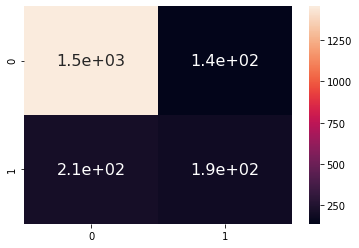

In [17]:
#построим матрицу ошибок по лучшей модели 
sns.heatmap(confusion_matrix(target_valid, predictions_valid_tree), annot=True, annot_kws={"size": 16})

In [18]:
#увеличим выборку путем увеличения количества ушедших клиентов
def upsample(features, target, repeat):
    features_zeros = features[target == 0]
    features_ones = features[target == 1]
    target_zeros = target[target == 0]
    target_ones = target[target == 1]

    features_upsampled = pd.concat([features_zeros] + [features_ones] * repeat)
    target_upsampled = pd.concat([target_zeros] + [target_ones] * repeat)
    
    features_upsampled, target_upsampled = shuffle(
        features_upsampled, target_upsampled, random_state=12345)
    
    return features_upsampled, target_upsampled

features_upsampled, target_upsampled = upsample(features_train_scaled, target_train, 3)

In [19]:
#уменьшим выборку путем уменьшения количества не ушедших клиентов
def downsample(features, target, fraction):
    features_zeros = features[target == 0]
    features_ones = features[target == 1]
    target_zeros = target[target == 0]
    target_ones = target[target == 1]

    features_downsampled = pd.concat(
        [features_zeros.sample(frac=fraction, random_state=12345)] + [features_ones])
    target_downsampled = pd.concat(
        [target_zeros.sample(frac=fraction, random_state=12345)] + [target_ones])
    
    features_downsampled, target_downsampled = shuffle(
        features_downsampled, target_downsampled, random_state=12345)
    
    return features_downsampled, target_downsampled

features_downsampled, target_downsampled = downsample(features_train_scaled, target_train, 0.25)

In [20]:
#проверим количество ушедших и не ушедших клиентов после апсемпла
target_upsampled.value_counts()

0    4778
1    3666
Name: Exited, dtype: int64

In [21]:
#проверим количество ушедших и не ушедших клиентов после даунсемпла
target_downsampled.value_counts()

1    1222
0    1194
Name: Exited, dtype: int64

### Вывод

В данном разделе увеличили количество ушедших клиентов и уменьшили количество текущих клиентов и сохранили их в двух разных выборках для дальнейшего анализа, для достижения баланса классов

## Тестирование модели

- Исследуем модель дерева решений

In [22]:
best_tree_model = None
best_tree_result = 0

for method in ['downsampled', 'upsampled', 'balanced']:
    for depth in range (1, 11):
        if method is 'balanced':
            model = DecisionTreeClassifier(random_state=12345, max_depth=depth, class_weight='balanced')
        else:
            model = DecisionTreeClassifier(random_state=12345, max_depth=depth)
        if method is 'downsampled':
            model.fit(features_downsampled, target_downsampled)
        elif method is 'upsampled':
            model.fit(features_upsampled, target_upsampled)
        else:
            model.fit(features_train_scaled, target_train)
        predictions_valid = model.predict(features_valid_scaled)
        result = f1_score(target_valid, predictions_valid)
        if result > best_tree_result:
            best_tree_model = model
            best_tree_result = result
            best_tree_depth = depth
            best_method = method

print('Результат на валидационной выборке:')
display(best_tree_result)
print('Наилучшая глубина дерева:')
display(best_tree_depth)
print('Наилучший метод:')
best_method

Результат на валидационной выборке:


0.5779816513761469

Наилучшая глубина дерева:


5

Наилучший метод:


'upsampled'

- Исследуем модель случайного леса

In [23]:
best_forest_model = None
best_forest_result = 0

for method in ['downsampled', 'upsampled', 'balanced']:
    for est in range(10, 51, 10):
        for depth in range (1, 11):
            if method is 'balanced':
                model = RandomForestClassifier(random_state=12345, n_estimators=est,
                                               max_depth=depth, class_weight='balanced')
            else:
                model = RandomForestClassifier(random_state=12345, n_estimators=est,
                                               max_depth=depth)
            if method is 'downsampled':
                model.fit(features_downsampled, target_downsampled)
            elif method is 'upsampled':
                model.fit(features_upsampled, target_upsampled)
            else:
                model.fit(features_train_scaled, target_train)
            predictions_valid = model.predict(features_valid_scaled)
            result = f1_score(target_valid, predictions_valid)
            if result > best_forest_result:
                best_forest_model = model
                best_forest_result = result
                best_forest_est = est
                best_forest_depth = depth
                best_method = method
                
print('Результат на валидационной выборке:')
display(best_forest_result)
print('Наилучшее кол-во деревьев:')
display(best_forest_est)
print('Наилучшая максимальная глубина дерева:')
display(best_forest_depth)
print('Наилучший метод:')
best_method

Результат на валидационной выборке:


0.6087962962962963

Наилучшее кол-во деревьев:


50

Наилучшая максимальная глубина дерева:


9

Наилучший метод:


'upsampled'

- Исследуем модель логистической регрессии

In [24]:
best_logistic_result = 0
for method in ['downsampled', 'upsampled', 'balanced']:
    if method is 'balanced':
        model = LogisticRegression(random_state=12345, solver='liblinear', class_weight='balanced')
    else:
        model = LogisticRegression(random_state=12345, solver='liblinear')
    
    if method is 'downsampled':
        model.fit(features_downsampled, target_downsampled)
    elif method is 'upsampled':
        model.fit(features_upsampled, target_upsampled)
    else:
        model.fit(features_train_scaled, target_train)
    predictions_valid = model.predict(features_valid_scaled)
    result = f1_score(target_valid, predictions_valid)
    if result > best_logistic_result:
        best_logistic_result = result
        best_method = method
print('Результат на валидационной выборке:')
display(result)
print('Наилучший метод:')
best_method

Результат на валидационной выборке:


0.47965367965367967

Наилучший метод:


'upsampled'

### Вывод

В данном разделе проверялись модели, которым подавалась выборка с разными способами борьбы с дисбалансом классов, было выявлено, что модель леса решений показывает наилучший результат на валидационной выборке со значением f1_score равным 0.6 с использованием такого метода борьбы с дисбалансом как upsample, при 50 деревьях с глубиной 9, данная модель и была взята для тестовой выборки. Также было замечено, что вне зависимости от модели upsample оказался лучшим методом на валидационной выборке по сравнению с downsample и использованием метода class_weight со значением balanced.

## Проверка модели на тестовой выборке

In [25]:
predictions_test = best_forest_model.predict(features_test_scaled)
result = f1_score(target_test, predictions_test)
result

0.6021003500583431

In [26]:
probabilities_test = best_forest_model.predict_proba(features_test_scaled)
probabilities_one_test = probabilities_test[:, 1]

auc_roc = roc_auc_score(target_test, probabilities_one_test)

print(auc_roc)

0.8570595009360528


In [30]:
# roc curve for models
fpr, tpr, thresh = roc_curve(target_test, probabilities_one_test, pos_label=1)

# roc curve for tpr = fpr 
random_probs = [0 for i in range(len(target_test))]
p_fpr, p_tpr, _ = roc_curve(target_test, random_probs, pos_label=1)

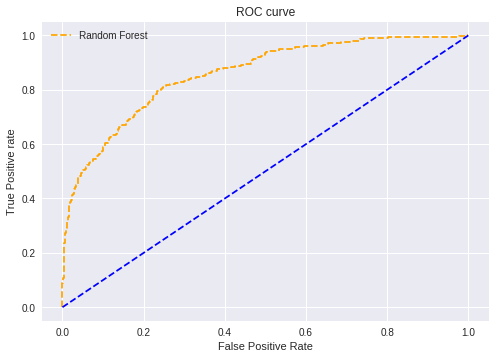

In [31]:
plt.style.use('seaborn')

# plot roc curves
plt.plot(fpr, tpr, linestyle='--',color='orange', label='Random Forest')
plt.plot(p_fpr, p_tpr, linestyle='--', color='blue')
# title
plt.title('ROC curve')
# x label
plt.xlabel('False Positive Rate')
# y label
plt.ylabel('True Positive rate')

plt.legend(loc='best')
plt.savefig('ROC',dpi=300)
plt.show();

### Вывод

В данном разделе лучшая модель с предыдущего шага была проверена на тестовой выборке и был получен результат f1_score равный 0.6, что удовлетворяет требованиям, также на тестовой выборке было проверено значение auc_roc, которое оказалось равно 0.86, что является достаточно большим результатом, по сравнению со случайно моделью, когда auc_roc была бы равна 0.5

# Общий вывод

В ходе работы над проектом был открыт и изучен файл, проведена предобработка данных и преобразование категориальных признаков в численные для дальнейшего удобства работы с ними, далее было произведено разбиение датасета на 3 выборки: тренировочную, валидационную и тестовую в соотношении 3:1:1. Далее были исследованы модели машинного обучения с разными гиперпараметрами без учета дисбаланса классов в ходе которой было выявлено, что дерево решений с максимальной глубиной равной 8, показало наилучший результат на валидационной выборке. Далее был произведен апсемплинг положительных классов и даунсемплинг отрицательных для балансировки классов в разных выборках, после чего модели были повторно протестированы с учетом параметра `class_weight` как альтернативного способа борьбы с дисбалансом, установленному со значением `balanced`, где модель случайного леса с кол-вом деревьев равным 50 и максимальной глубиной равной 9 показала лучший результат. В итоге данная модель была использована при определении оттока на тестовой выборке на которой `f1_score` показал результат 0.6, а также приведено значение roc_auc равное 0.85, которое позволяет сделать вывод о том, что модель не является случайной.